# Основные концепции Machine Learning. Домашняя работа

In [1]:
### Тут нужно сделать импорты всех необходимых библиотек ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
### Здесь требуется загрузить датасет phones.csv ###
df_phones = pd.read_csv('1.8_phones.csv')
df_phones.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


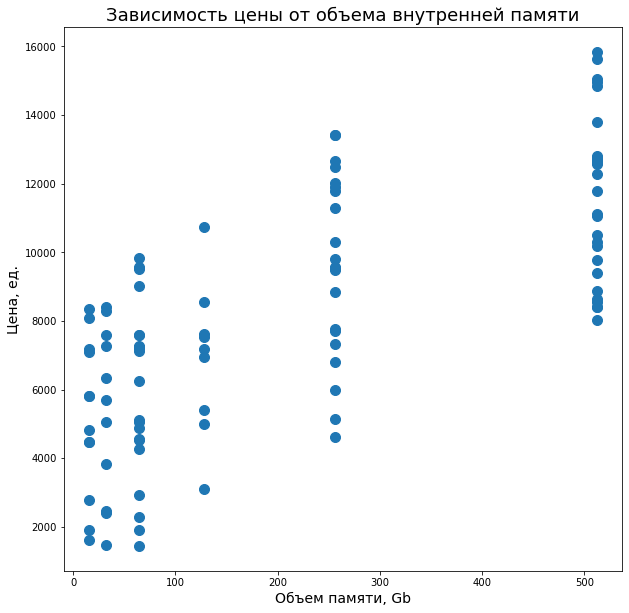

In [3]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df_phones['disk'], df_phones['price'], s=100)
ax.set_xlabel('Объем памяти, Gb', fontsize=14)
ax.set_ylabel('Цена, ед.', fontsize=14)
ax.set_title('Зависимость цены от объема внутренней памяти', fontsize=18)

plt.show()

Задание 1: обучить модель регрессии

In [4]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
from sklearn.linear_model import LinearRegression
X = df_phones[['disk']]
y = df_phones['price']

In [5]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
reg = LinearRegression().fit(X, y)
reg.predict(X[0:1])[0]

6120.265447090668

Задание 2: обучить модель классификации

In [15]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
X = df_phones[['price', 'year']] 
y = df_phones['os']

In [16]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
cl = DecisionTreeClassifier().fit(X, y)
cl.predict(X[3:4])[0], y[3]


('iOS', 'iOS')

In [17]:
print(export_text(cl))

|--- feature_0 <= 7660.50
|   |--- feature_1 <= 2012.50
|   |   |--- feature_0 <= 3855.50
|   |   |   |--- class: Android
|   |   |--- feature_0 >  3855.50
|   |   |   |--- class: iOS
|   |--- feature_1 >  2012.50
|   |   |--- class: Android
|--- feature_0 >  7660.50
|   |--- feature_1 <= 2015.50
|   |   |--- class: iOS
|   |--- feature_1 >  2015.50
|   |   |--- feature_0 <= 11017.00
|   |   |   |--- class: Android
|   |   |--- feature_0 >  11017.00
|   |   |   |--- class: iOS



Задание 3: обучить модель кластеризации

In [8]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
from sklearn.cluster import KMeans
X = df_phones[['disk', 'price']] 

In [9]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###
clust = KMeans(n_clusters=3).fit(X)
clust.cluster_centers_

array([[  212.17391304,  8323.32608696],
       [  410.66666667, 12896.83333333],
       [   70.4       ,  3958.53333333]])

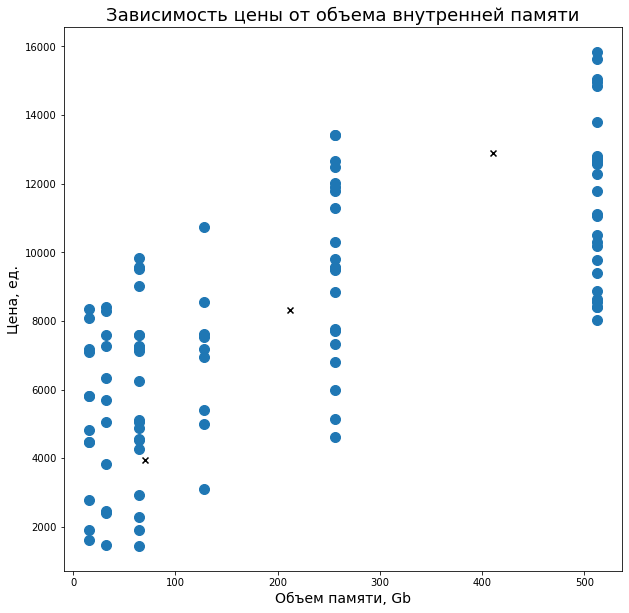

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df_phones['disk'], df_phones['price'], s=100)
ax.set_xlabel('Объем памяти, Gb', fontsize=14)
ax.set_ylabel('Цена, ед.', fontsize=14)
ax.set_title('Зависимость цены от объема внутренней памяти', fontsize=18)
ax.scatter(clust.cluster_centers_[0][0], clust.cluster_centers_[0][1], marker='x', color='black')
ax.scatter(clust.cluster_centers_[1][0], clust.cluster_centers_[1][1], marker='x', color='black')
ax.scatter(clust.cluster_centers_[2][0], clust.cluster_centers_[2][1], marker='x', color='black')


plt.show()